# Iniciación en Python con Aplicaciones en Aceración (día 03)

**Dr. Edgar Ivan Castro Cedeño**

[edgar.castro@cinvestav.mx](mailto:edgar.castro@cinvestav.mx)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import desulf # funciones propias

# 3. Balance de masa para el azufre en metal y escoria

## 3.1 Balance de azufre por tonelada de acero

El balance de masa de azufre en la escoria y el metal, normalizado para 1000 kg (1 tonelada) de acero está dado por:


$$\underbrace{1000 \left[\omega_S\right]_0 + M_{sl} \left(\omega_S\right)_0}_{estado \, inicial} = \underbrace{1000 \left[\omega_S\right] + M_{sl} \left(\omega_S\right)}_{estado \, final} $$

donde 

- $M_{sl}$ es la masa de escoria en kg por tonelada de acero.

- $[\omega_S]$ es la fracción másica de azufre en el metal.

- $(\omega_S)$ es la fracción másica de azufre en la escoria.

El balance suele simplificarse considerando que la masa de azufre inicial en la escoria es despreciable:

$$\underbrace{1000 \left[\omega_S\right]_0}_{estado \, inicial} = \underbrace{1000 \left[\omega_S\right] + M_{sl} \left(\omega_S\right)}_{estado \, final} $$

## 3.2 Balance en términos del coeficiente de reparto de azufre

Con un poco de manipulación algebráica se puede reescribir el balance en términos del coeficiente de reparto, $L_S$:


$$1000 \left[\omega_S\right]_0 = 1000 \left[ \omega_S \right] + M_{sl} \left(\omega_S \right)$$

$$1000 \frac{\left[\omega_S\right]_0}{\left[\omega_S\right]} = 1000 + M_{sl} \underbrace{\frac{\left(\omega_S\right)}{\left[\omega_S\right]}}_{L_S} $$

Quedando así:

$$\frac{\left[\omega_S\right]_0}{\left[\omega_S\right]} = 1 + \frac{M_{sl}}{1000} L_S $$

Esta función permite evaluar el contenido de azufre una vez que el equilibrio metal-escoria se ha alcanzado, es decir, el límite termodinámico para el proceso de desulfuración.

Reacomodando la ecuación, se obtienen dos formas útiles:

**Cociente entre el contenido de azufre en el metal al alcanzar el equilibrio y el contenido de azufre inicial en el metal**

$$\frac{\left[\omega_S \right]}{\left[\omega_S\right]_0} = \frac{1}{1 + \frac{M_{sl}}{1000} L_S} $$

In [2]:
def desulfRatio(Msl, Ls):
    return 1 / (1 + (Msl/1000) * Ls)

**Porcentaje de desulfuración en el metal al alcanzar el equilirio**

El porcentaje de desulfuración se escribe como:

$$R_S = \left(1 - \frac{[\omega_S]}{[\omega_S]_0} \right) \times 100 \%$$

Reescribiendo la ecuación, en términos de $L_S$ y $M_{sl}$, se tiene:

$$R_S = \left(1 - \frac{1}{1 + \frac{M_{sl}}{1000} L_S} \right) \times 100 \%$$

In [3]:
def desulfPct(Msl, Ls):
    return (1 - (1 / (1 + (Msl/1000) * Ls))) * 100

## 3.3 Implicaciones metalúrgicas del balance

### 3.3.1 Porcentaje de desulfuración

Al aumentar los valores de $M_{sl}$ y $L_S$, el término en la resta se hace más pequeño. Consecuentemente, el valor de $R_S$ aumenta.

$$R_S = \left(1 - \frac{1}{1 + \frac{M_{sl}}{1000} L_S} \right) \times 100 \%$$

In [4]:
# masa de escoria
Msl = np.linspace(0, 50, 101)

# Valores de Ls
LS = np.array([50, 100, 200, 400, 800])

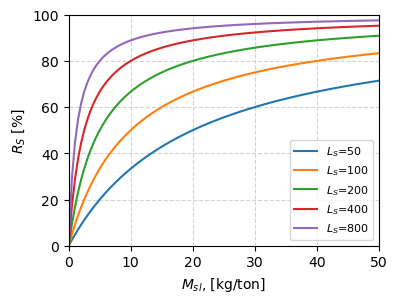

In [5]:
fig, ax = plt.subplots(figsize=(4,3))


for Ls in LS:
    pctDesulf = desulf.desulfPct(Msl, Ls)
    label = "".join([r"$L_S$=", str(Ls)])
    ax.plot(Msl, pctDesulf, label=label)

# Format graph
ax.set_ylim(1, 1e4)
ax.set_xlabel(r"$M_{sl}$, [kg/ton]")
ax.set_xlim(0, 50)
ax.set_ylabel(r"$R_S$ [%]")
ax.set_ylim(0, 100)
ax.grid(ls='--', which='both', color='lightgray')
ax.legend(loc='lower right', fontsize=8)

plt.show()

### 3.3.2 Estimación de la masa de escoria requerida

Reacomodando la ecuación del balance, se obtiene una expresión que permite estimar la masa de escoria requerida para satisfacer un requerimiento de desulfuración al equilibrio.

$$\frac{\left[\omega_S\right]_0}{\left[\omega_S\right]} = 1 + \frac{M_{sl}}{1000} L_S $$

$$\frac{\left[\omega_S\right]_0}{\left[\omega_S\right]} -1 = \frac{M_{sl}}{1000} L_S$$

$$M_{sl} = \frac{1000}{L_S} \left(\frac{\left[\omega_S\right]_0}{\left[\omega_S\right]} -1 \right)$$

In [6]:
def mSlagEq(Ls, wS0, wS):
    return (1000/Ls) * (wS0/wS - 1)

In [7]:
# coeficiente de reparto
Ls = 100

# rango de azufres iniciales y en equilibrio
wS0 = np.linspace(50, 500, 80)
wS = np.linspace(1, 200, 80)

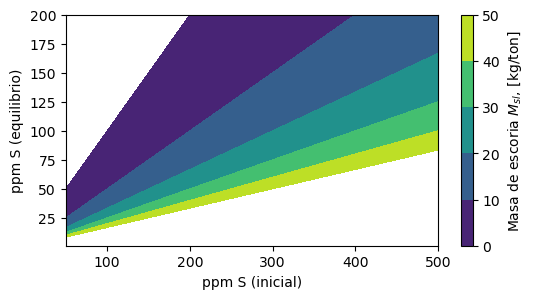

In [8]:
fig, ax = plt.subplots(figsize=(6, 3))

# superficie de respuesta
X, Y = np.meshgrid(wS0, wS)
Z = desulf.mSlagEq(Ls, X, Y)

# grafico de superficie de respuesta
CS = ax.contourf(X, Y, Z, levels=[0, 10, 20, 30, 40, 50])
cbar = fig.colorbar(CS, ax=ax)

ax.set_xlabel("ppm S (inicial)")
ax.set_ylabel("ppm S (equilibrio)")

cbar.ax.set_ylabel(r'Masa de escoria $M_{sl}$, [kg/ton]')

plt.show()

## 3.4 Referencias

[Slag Atlas (1995)](https://www.stahleisen.de/product/slag-atlas/)  
ed. by VDEh. Verlag Stahleisen GmbH, Düsseldorf.

[The Making, Shaping and Treating of Steel: Steelmaking and Refining Volume (1998)](https://imis.aist.org/store/detail.aspx?id=PB-332)  
ed. by R. J. Fruehan, Association of Iron and Steel Engineers.

[Andersson, M.A., Jönsson, P. G., & Nzotta, M. M. (1999)](https://www.jstage.jst.go.jp/article/isijinternational1989/39/11/39_11_1140/_pdf)  
Application of the sulphide capacity concept on high-basicity ladle slags used in bearing-steel production.  
ISIJ international, 39(11), 1140-1149.

[Secondary Steelmaking: Principles and Applications (2000)](https://doi.org/10.1201/9781420042313)  
GHOSH, Ahindra.
CRC Press.